In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import cv2
import random
from sklearn.metrics import confusion_matrix

In [2]:
classes = ["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora", "ragno", "scoiattolo"]

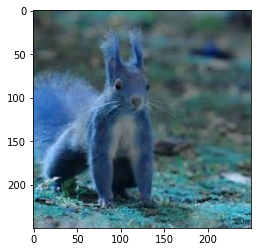

In [3]:
datadir = '../input/animals10/raw-img'

for cl in classes:
    path = os.path.join(datadir, cl)
    for im_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, im_path))
        plt.imshow(img)
        break

In [4]:
dataset = []
def create_dataset():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img, (128,128))
                dataset.append([resized_img, cls_num])
            except Exception as e:
                pass

In [5]:
create_dataset()

In [6]:
random.shuffle(dataset)
for i in dataset[:10]:
    print(classes[i[1]])

ragno
gallina
ragno
pecora
farfalla
cane
gallina
cane
ragno
gatto


In [7]:
x =  []
y = []
for pic, label in dataset:
    x.append(pic)
    y.append(label)

In [8]:
x = np.array(x).reshape(-1, 128,128, 3)

In [9]:
y = np.array(y)

In [10]:
print(type(x),x.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (26179, 128, 128, 3)
<class 'numpy.ndarray'> (26179,)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.model_selection import train_test_split

In [12]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.25, random_state = 0)

In [13]:
# name translation
classes2 = translate = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]
classes2

['dog',
 'horse',
 'elephant',
 'butterfly',
 'chicken',
 'cat',
 'cow',
 'sheep',
 'spider',
 'squirrel']

In [14]:
def img_show(pic, label, index):
    plt.figure(figsize=(15,2))
    plt.imshow(pic[index])
    plt.xlabel(classes2[label[index]], fontsize=10)

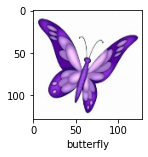

In [15]:
img_show(x_test, y_test, 9)

In [16]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(128,128, 3)),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    BatchNormalization(),
    
    
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    BatchNormalization(),
    
    Flatten(),
    Flatten(),
    Dropout(0.2),
    
    Dense(512, kernel_constraint=max_norm(3), activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(256, kernel_constraint=max_norm(3), activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
   
    Dense(10, activation='softmax')
    
    
])

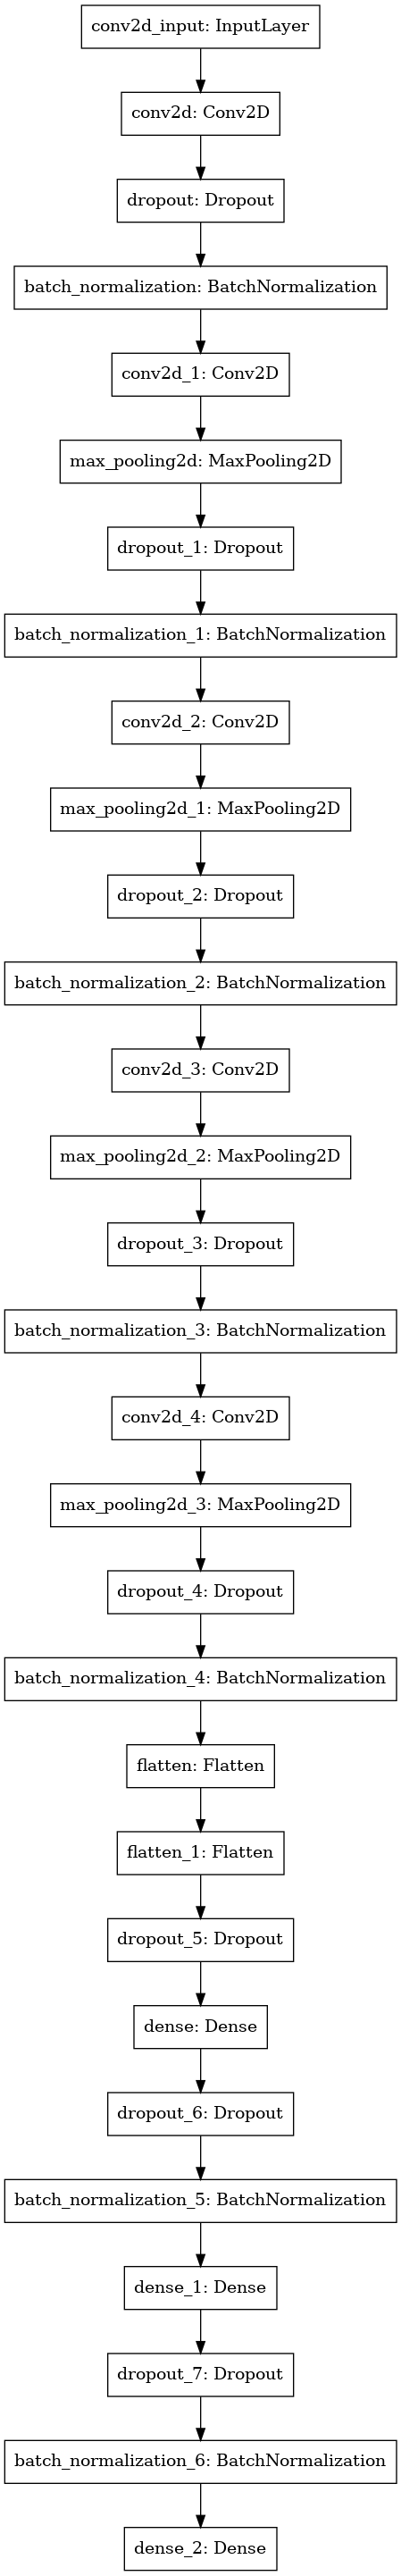

In [17]:
tf.keras.utils.plot_model(model , to_file = "model.png")


In [18]:
from keras import optimizers
model.compile(
    optimizer=optimizers.Adam(lr=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:


# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
history=model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=20, batch_size=64,callbacks=[
        EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 3,
                               restore_best_weights = True), # if val loss decreases for 10 epochs in a row, stop training,
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min') 
    ])

Epoch 1/20
246/246 [==============================] - 60s 205ms/step - loss: 2.1879 - accuracy: 0.2994 - val_loss: 1.5791 - val_accuracy: 0.4721
Epoch 2/20
246/246 [==============================] - 46s 187ms/step - loss: 1.3846 - accuracy: 0.5311 - val_loss: 1.5478 - val_accuracy: 0.5017
Epoch 3/20
246/246 [==============================] - 46s 187ms/step - loss: 1.0995 - accuracy: 0.6255 - val_loss: 1.2737 - val_accuracy: 0.5712
Epoch 4/20
246/246 [==============================] - 46s 187ms/step - loss: 0.9017 - accuracy: 0.6884 - val_loss: 1.0633 - val_accuracy: 0.6400
Epoch 5/20
246/246 [==============================] - 46s 187ms/step - loss: 0.7315 - accuracy: 0.7463 - val_loss: 1.0810 - val_accuracy: 0.6402
Epoch 6/20
246/246 [==============================] - 46s 187ms/step - loss: 0.6087 - accuracy: 0.7932 - val_loss: 0.9417 - val_accuracy: 0.7009
Epoch 7/20
246/246 [==============================] - 46s 187ms/step - loss: 0.4842 - accuracy: 0.8376 - val_loss: 1.0521 - val_ac

In [20]:
model.evaluate(x_test,y_test,verbose=1)

164/164 [==============================] - 6s 28ms/step - loss: 0.7069 - accuracy: 0.7733


[0.7068772315979004, 0.7733002305030823]

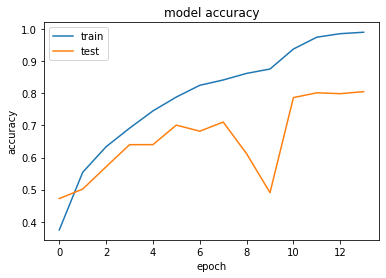

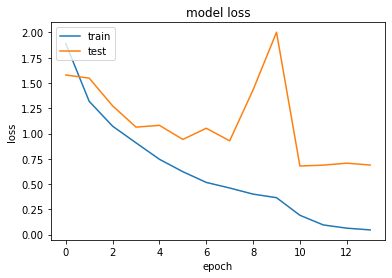

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

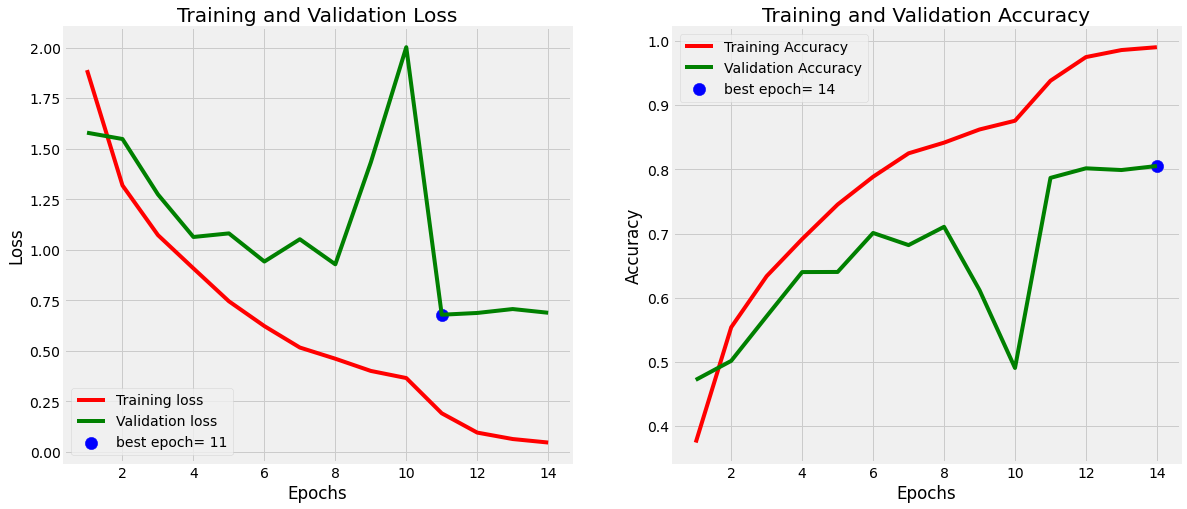

In [22]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [23]:
y_pred = model.predict(x_test)
y_pred


array([[4.5389462e-02, 2.4431629e-01, 7.9165987e-04, ..., 1.1881678e-01,
        3.4850764e-03, 5.9280279e-05],
       [2.9091588e-03, 3.3952044e-03, 1.0239789e-02, ..., 7.2250720e-03,
        5.8440954e-05, 9.6545279e-01],
       [4.8489878e-01, 1.2292171e-01, 2.8168272e-02, ..., 2.2307683e-02,
        3.8014278e-02, 1.9103359e-02],
       ...,
       [9.6342933e-01, 1.7355144e-02, 1.7872497e-03, ..., 9.7419288e-05,
        1.5406953e-03, 9.9193882e-03],
       [6.0105640e-01, 9.7150318e-03, 7.4792728e-02, ..., 1.7520572e-01,
        2.1725744e-02, 2.4592059e-02],
       [1.2249319e-02, 1.0017761e-02, 3.8113184e-02, ..., 3.6189396e-02,
        7.6469558e-01, 1.3689769e-02]], dtype=float32)

In [24]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([6, 9, 0, ..., 0, 0, 8])

In [25]:

cm = confusion_matrix(classes2,y_pred_classes)
print(cm)

ValueError: Found input variables with inconsistent numbers of samples: [10, 5236]

In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)

In [ ]:

# Assuming 'yhat_probs' is a 1-dimensional array.

# No need for additional indexing on 'yhat_probs' as it's already 1-dimensional
yhat_probs = yhat_probs

# 'yhat_classes' should be the result of applying a threshold to 'yhat_probs' to convert probabilities to binary classes
# For example, using a threshold of 0.5:
threshold = 0.5
yhat_classes = (yhat_probs >= threshold).astype(int)


In [ ]:
y_pred = model.predict(x_test)


In [ ]:
y_pred_probs = model.predict(x_test)


In [ ]:
y_pred_classes = np.argmax(y_pred_probs, axis=1)


In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

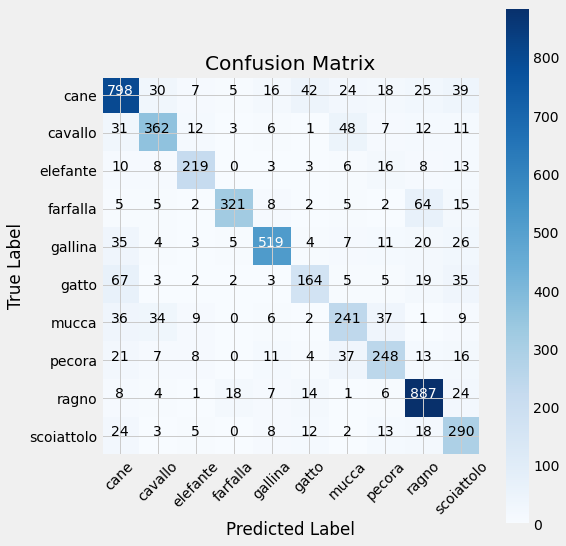

In [26]:
import itertools
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize= (8, 8))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()